# Setup #

In [22]:
#Packages
!pip install pyvis
!pip install pandas
!pip install networkx
!pip install matplotlib
!pip install seaborn
!pip install scipy

You should consider upgrading via the 'c:\program files\python 3.9\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'c:\program files\python 3.9\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'c:\program files\python 3.9\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'c:\program files\python 3.9\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'c:\program files\python 3.9\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'c:\program files\python 3.9\python.exe -m pip install --upgrade pip' command.


In [1]:
# Imports
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
from datetime import datetime
from networkx.algorithms import approximation
from pyvis.network import Network
import utils
from utils import *

In [38]:
from importlib import reload
reload(utils)

<module 'utils' from 'C:\\Users\\Sebby\\YouTubeRecSys\\utils.py'>

In [2]:
# Load in regular and channel graph.
G = load_graph('graph.gz')
channel_G = load_graph('channel_graph.gz')

In [2]:
# Load in dataframes if applicable
channel_df = pd.read_csv('full_data/channel.csv')
recommendation_df = pd.read_csv('full_data/recommendation.csv')
video_df = pd.read_csv('full_data/video.csv')
video_df = video_df.sort_values('id')

In [ ]:
# Transforms so node attributes are of type int and not int64
video_df['view_count'] = video_df['view_count'].astype('int')

In [14]:
len(channel_df), len(recommendation_df), len(video_df)

(163193, 1283022, 638714)

In [6]:
video_df.describe()

,id,channel_id,like_count,view_count,crawl_attempt_count,client_id
count,638714.000000,638714.000000,6.387140e+05,6.387140e+05,638714.000000,638714.0
mean,344233.994707,60860.096364,2.453901e+04,1.768073e+06,0.355688,1.0
std,200320.106778,69231.140452,1.728917e+05,2.089204e+07,0.857298,0.0
min,1.000000,1.000000,0.000000e+00,1.000000e+00,0.000000,1.0
25%,169761.250000,5089.000000,4.040000e+02,1.611525e+04,0.000000,1.0
50%,342654.500000,29629.000000,2.200000e+03,9.326750e+04,0.000000,1.0
75%,517927.750000,104569.000000,1.100000e+04,5.288508e+05,0.000000,1.0
max,693425.000000,237384.000000,2.700000e+07,2.134753e+09,42.000000,1.0


In [62]:
video_df.head()

,id,channel_id,url,raw_like_count,like_count,raw_view_count,view_count,title,description,raw_published_on,published_on,crawled,latest_crawl_attempted_at,crawl_attempt_count,created_at,updated_at,client_id
91719,1,1,https://www.youtube.com/watch?v=HqsIOTEbriY,18K,18000,"611,836 views",611836,China Airlines Crashes 747 in Chicago | Viral ...,China Airlines 747 loses control on a taxiway ...,"Mar 20, 2022",2022-03-20,t,1970-01-01 01:00:00,0,2022-08-10 15:07:56.209,2022-08-10 15:07:56.209,1
39173,2,2,https://www.youtube.com/watch?v=491t1JrvY2M,13K,13000,"322,141 views",322141,Cargo Pilot vs Passenger Pilot! Can you REALLY...,Get the FREE Mentour Aviation app 📲https://www...,"Apr 21, 2020",2020-04-21,t,2022-08-10 13:07:56.595513,0,2022-08-10 15:07:56.235,2022-08-10 15:07:56.235,1
39272,3,2,https://www.youtube.com/watch?v=AM01NSZyA7I,41K,41000,"1,497,198 views",1497198,Easyjet A320 tells United Boeing 787 to GO ARO...,Get 20% discount on the yearly subscription of...,"Aug 13, 2021",2021-08-13,t,2022-08-10 13:07:56.961684,0,2022-08-10 15:07:56.263,2022-08-10 15:07:56.263,1
35838,4,3,https://www.youtube.com/watch?v=ZXo66rawpHQ,6.2K,6200,"343,165 views",343165,"The Huge, Weird Batteries of the Future","As the planet gets hotter, engineers are racin...","Aug 4, 2022",2022-08-04,t,2022-08-10 13:07:57.083431,0,2022-08-10 15:07:56.289,2022-08-10 15:07:56.289,1
35839,5,2,https://www.youtube.com/watch?v=DWhZWtDinLg,36K,36000,"1,497,468 views",1497468,HOW This Aircraft FELL 30 000 Feet in Less Tha...,Join The Airline Pilot Club for FREE here 👉 ht...,"Nov 6, 2021",2021-11-06,t,2022-08-10 13:07:57.127171,0,2022-08-10 15:07:56.303,2022-08-10 15:07:56.303,1


In [9]:
channel_df.head()

,id,youtube_id,url,html_lang,type,language,short_name,human_name,raw_subscriber_count,subscriber_count,description,created_at,updated_at
0,1,UCovVc-qqwYp8oqwO3Sdzx7w,https://www.youtube.com/c/74gear,en,/c/,NaN,74gear,74 Gear,920K subscribers,920000,74 Gear / Pilot Kelsey\nBoeing 747 Pilot \nAll...,2022-08-10 15:07:56.178,2022-08-10 15:07:56.178
1,2,UCwpHKudUkP5tNgmMdexB3ow,https://www.youtube.com/c/MentourPilotaviation,en,/c/,NaN,MentourPilotaviation,Mentour Pilot,1.2M subscribers,1200000,Hi! \nOn my channel I will give you my point o...,2022-08-10 15:07:56.228,2022-08-10 15:07:56.228
2,3,UCUMZ7gohGI9HcU9VNsr2FJQ,https://www.youtube.com/BloombergTV,en,/,NaN,BloombergTV,Bloomberg Quicktake: Originals,3.23M subscribers,3230000,Bloomberg Quicktake is a global streaming news...,2022-08-10 15:07:56.283,2022-08-10 15:07:56.283
3,4,UCXh6VKhioaeEaMQasii7IfQ,https://www.youtube.com/c/theflightchannel,en,/c/,NaN,theflightchannel,TheFlightChannel,1.38M subscribers,1380000,Welcome to TheFlightChannel\n\nIf you love avi...,2022-08-10 15:07:56.336,2022-08-10 15:07:56.336
4,5,UC6n8I1UDTKP1IWjQMg6_TwA,https://www.youtube.com/c/Theb1mGoogle,en,/c/,NaN,Theb1mGoogle,The B1M,2.58M subscribers,2580000,We love construction and we want the whole wor...,2022-08-10 15:11:22.83,2022-08-10 15:11:22.83


In [10]:
recommendation_df.head()

,id,from_id,to_id,rank,created_at,updated_at
0,1,1,2,0,2022-08-10 15:07:56.246,2022-08-10 15:07:56.246
1,2,1,3,1,2022-08-10 15:07:56.273,2022-08-10 15:07:56.273
2,3,1,4,2,2022-08-10 15:07:56.297,2022-08-10 15:07:56.297
3,4,1,5,3,2022-08-10 15:07:56.31,2022-08-10 15:07:56.31
4,5,1,6,4,2022-08-10 15:07:56.32,2022-08-10 15:07:56.32


In [65]:
vid_to_channel = video_df[['id', 'channel_id']].rename(columns={'channel_id': 'from_channel_id'})
vid_to_channel2 = video_df[['id', 'channel_id']].rename(columns={'channel_id': 'to_channel_id'})
channel_to_channel = recommendation_df.merge(vid_to_channel, left_on='from_id', right_on='id').merge(vid_to_channel2, left_on='to_id', right_on='id')
channel_to_channel = channel_to_channel[['from_channel_id', 'to_channel_id']]
channel_to_channel
channel_G = nx.from_pandas_edgelist(df=channel_to_channel, source="from_channel_id", target="to_channel_id", create_using=nx.MultiDiGraph)

In [33]:
# This takes extremely long to run. 
relevant_cols = ['title', 'view_count', 'published_on']

add_attr_from_pandas(G, video_df, 'id', relevant_cols)

In [44]:
# Optional: Undirected graph 
undir_G = G.to_undirected()

# Directed Graph Analysis

In [38]:
video_df[video_df['id'] == 630000]['title']

622008    BMW M140I Shadow Edition gets Detailed And Mac...
Name: title, dtype: object

In [37]:
G.nodes[630000]

{'title': 'BMW M140I Shadow Edition gets Detailed And Machine Polished - Detailing- Ceramic - Deep Clean',
 'view_count': 2902,
 'published_on': '2022-03-13'}

In [41]:
# There are subgraphs which are connected to the rest of the graph only by one node.
nx.node_connectivity(G)

0

In [44]:
# Not super high amount of clustering, ranges from 0 to 1.
nx.average_clustering(G)

0.05175858797751722

In [ ]:
# Diameter of the graph
# Can't calculate diameter of graph because not all recommendations lead back to the original video
nx.diameter(G)

In [43]:
# Degree centraltiy 
nx.degree_centrality(G)

{1: 2.6989867686142766e-05,
 2: 5.080445682097462e-05,
 3: 9.684599581498287e-05,
 4: 0.0015241337046292386,
 5: 3.969098189138642e-05,
 6: 3.334042478876459e-05,
 7: 0.00034451772281723415,
 8: 0.0007033241991153674,
 9: 7.938196378277285e-05,
 10: 5.080445682097462e-05,
 11: 3.969098189138642e-05,
 12: 0.0021274366293783124,
 13: 0.0006588702993970147,
 14: 0.00010002127436629379,
 15: 0.0014257000695386004,
 16: 0.000312764937304125,
 17: 0.000184166155976033,
 18: 0.00015241337046292385,
 19: 0.0003937345403625533,
 20: 0.0013431428272045166,
 21: 7.620668523146193e-05,
 22: 3.0165146237453682e-05,
 23: 4.762917826966371e-05,
 24: 2.8577506961798222e-05,
 25: 4.4453899718352795e-05,
 26: 3.175278551310914e-05,
 27: 4.921681754531916e-05,
 28: 3.810334261573096e-05,
 29: 3.651570334007551e-05,
 30: 0.00017940323814906662,
 31: 3.175278551310914e-05,
 32: 5.556737464794099e-05,
 33: 2.2226949859176397e-05,
 34: 7.144376740449555e-05,
 35: 6.98561281288401e-05,
 36: 3.0165146237453682

In [46]:
# Fraction of nodes that are directed at given node
nx.in_degree_centrality(G)

{1: 1.1113474929588199e-05,
 2: 3.492806406442005e-05,
 3: 8.09696030584283e-05,
 4: 0.001508257311872684,
 5: 2.3814589134831854e-05,
 6: 1.7464032032210025e-05,
 7: 0.0003286413300606796,
 8: 0.0007033241991153674,
 9: 6.350557102621828e-05,
 10: 3.492806406442005e-05,
 11: 2.3814589134831854e-05,
 12: 0.0021115602366217575,
 13: 0.00064299390664046,
 14: 8.414488160973922e-05,
 15: 0.0014257000695386004,
 16: 0.00029688854454757043,
 17: 0.00016828976321947844,
 18: 0.0001365369777063693,
 19: 0.0003778581476059987,
 20: 0.0013272664344479619,
 21: 6.0330292474907364e-05,
 22: 1.4288753480899111e-05,
 23: 3.175278551310914e-05,
 24: 1.2701114205243655e-05,
 25: 2.8577506961798222e-05,
 26: 1.587639275655457e-05,
 27: 3.334042478876459e-05,
 28: 2.2226949859176397e-05,
 29: 2.0639310583520938e-05,
 30: 0.00016352684539251206,
 31: 1.587639275655457e-05,
 32: 3.969098189138642e-05,
 33: 6.3505571026218275e-06,
 34: 5.556737464794099e-05,
 35: 5.397973537228553e-05,
 36: 1.428875348089

In [47]:
# Fraction of nodes that node is directed at 
# Oh these are all the same number because they recommend the same amount of videos.
nx.out_degree_centrality(G)

{1: 1.587639275655457e-05,
 2: 1.587639275655457e-05,
 3: 1.587639275655457e-05,
 4: 1.587639275655457e-05,
 5: 1.587639275655457e-05,
 6: 1.587639275655457e-05,
 7: 1.587639275655457e-05,
 8: 0.0,
 9: 1.587639275655457e-05,
 10: 1.587639275655457e-05,
 11: 1.587639275655457e-05,
 12: 1.587639275655457e-05,
 13: 1.587639275655457e-05,
 14: 1.587639275655457e-05,
 15: 0.0,
 16: 1.587639275655457e-05,
 17: 1.587639275655457e-05,
 18: 1.587639275655457e-05,
 19: 1.587639275655457e-05,
 20: 1.587639275655457e-05,
 21: 1.587639275655457e-05,
 22: 1.587639275655457e-05,
 23: 1.587639275655457e-05,
 24: 1.587639275655457e-05,
 25: 1.587639275655457e-05,
 26: 1.587639275655457e-05,
 27: 1.587639275655457e-05,
 28: 1.587639275655457e-05,
 29: 1.587639275655457e-05,
 30: 1.587639275655457e-05,
 31: 1.587639275655457e-05,
 32: 1.587639275655457e-05,
 33: 1.587639275655457e-05,
 34: 1.587639275655457e-05,
 35: 1.587639275655457e-05,
 36: 1.587639275655457e-05,
 37: 1.587639275655457e-05,
 38: 1.58

In [ ]:
# Over 30 minutes runtime
nx.closeness_centrality(G)

In [ ]:
# Long runtime
nx.betweenness_centrality(G)

In [ ]:
# Also undefined because of the fact the graph isn't strongly connected
nx.average_shortest_path_length(G)

In [51]:
# Average total degree of neighbors to node
nx.average_neighbor_degree(G)

{1: 9.0,
 2: 9.0,
 3: 9.0,
 4: 9.0,
 5: 9.0,
 6: 9.0,
 7: 10.0,
 8: 0.0,
 9: 9.0,
 10: 9.0,
 11: 9.0,
 12: 9.0,
 13: 10.0,
 14: 10.0,
 15: 0.0,
 16: 8.0,
 17: 10.0,
 18: 10.0,
 19: 10.0,
 20: 10.0,
 21: 9.0,
 22: 10.0,
 23: 10.0,
 24: 8.0,
 25: 8.0,
 26: 10.0,
 27: 10.0,
 28: 9.0,
 29: 9.0,
 30: 9.0,
 31: 10.0,
 32: 10.0,
 33: 8.0,
 34: 9.0,
 35: 10.0,
 36: 10.0,
 37: 10.0,
 38: 9.0,
 39: 10.0,
 40: 9.0,
 41: 9.0,
 42: 10.0,
 43: 10.0,
 44: 8.0,
 45: 9.0,
 46: 9.0,
 47: 9.0,
 48: 9.0,
 49: 8.0,
 50: 9.0,
 51: 9.0,
 52: 10.0,
 53: 10.0,
 54: 9.0,
 55: 8.0,
 56: 10.0,
 57: 10.0,
 58: 10.0,
 59: 9.0,
 60: 10.0,
 61: 9.0,
 62: 10.0,
 63: 9.0,
 64: 7.0,
 65: 8.0,
 66: 9.0,
 67: 9.0,
 68: 10.0,
 69: 9.0,
 70: 10.0,
 71: 10.0,
 72: 9.0,
 73: 10.0,
 74: 10.0,
 75: 10.0,
 76: 9.0,
 77: 10.0,
 78: 9.0,
 79: 10.0,
 80: 8.9,
 81: 10.0,
 82: 9.0,
 83: 7.8,
 84: 9.0,
 85: 9.0,
 86: 10.0,
 87: 6.0,
 88: 10.0,
 89: 10.0,
 90: 9.0,
 91: 10.0,
 92: 9.0,
 93: 10.0,
 94: 9.0,
 95: 10.0,
 96: 10.0,
 97: 9.

In [142]:
# Most recommended video is 49
degree_dict = nx.in_degree_centrality(G)
max(degree_dict, key=lambda x: degree_dict[x])

49

In [6]:
# most popular node.
G.nodes[49]

{'title': "John Cleese's War on Wokeism",
 'view_count': 566014,
 'published_on': '2022-08-01'}

In [31]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 1.0, 'Log number of predecessors per video')

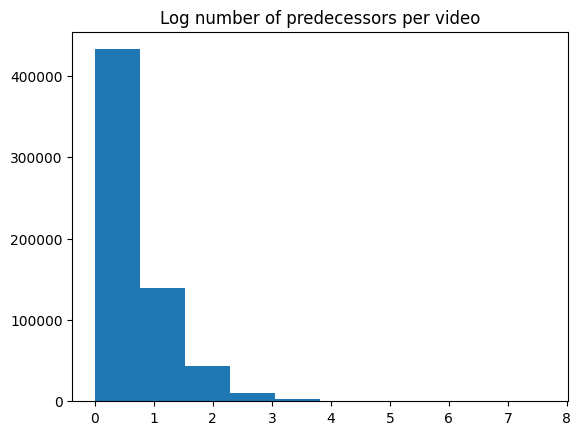

In [5]:
plt.hist([np.log(len(list(G.predecessors(i))) + 1) for i in G.nodes])
plt.title("Log number of predecessors per video")

In [24]:
from_popular = nx.bfs_tree(G, 49, depth_limit = 1)

In [25]:
for i in from_popular.nodes:
    from_popular.nodes[i]['size'] = G.nodes[i]['view_count']

In [26]:
# This visualizes the view counts of the videos that the popularly recommended video recommended
net = Network(notebook=True)
net.from_nx(from_popular)
net.show_buttons(filter_=["physics"])
net.show('from_popular.html')

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [41]:
to_popular = nx.bfs_tree(G, 49, reverse= True, depth_limit = 1)

In [ ]:
# This ego-network is too large it makes my notebook run slowly, I took a screenshot tho
net = Network(notebook=True)
net.from_nx(to_popular)
net.show('to_popular.html')

In [56]:
# Video is less popular than the videos that recommend it, interesting
popular_views = G.nodes[49]['view_count']
ego_views = []
for i in to_popular.nodes:
    if i != 49:
        ego_views.append(G.nodes[i]['view_count'])
print("Recommended video views: " + str(popular_views))
print("Ego network views avg: " + str(sum(ego_views) / len(ego_views)))

Recommended video views: 566014
Ego network views avg: 1101336.0924772401


# Undirected Graph Analysis

In [6]:
nx.is_connected(undir_G)

False

In [7]:
nx.number_connected_components(undir_G)

28

In [8]:
# The graph is not connected. Not sure how this happens? Will drop the unconnected parts for now. 
[len(c) for c in sorted(nx.connected_components(undir_G), key=len, reverse=True)]

[629611,
 49,
 20,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 9,
 8,
 7,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

### Visualizing one of the connected components

In [16]:
con_comp = undir_G.subgraph(sorted(nx.connected_components(undir_G), key=len, reverse=True)[1])

In [26]:
for i in con_comp.nodes:
    con_comp.nodes[i]['view_count'] = int(con_comp.nodes[i]['view_count'])

In [28]:
# These are all a certain type of video but I'm not sure why they're disconnected unless there was a restart of the crawler.
titles = []
for i in con_comp.nodes:
    titles.append(con_comp.nodes[i])
titles

[{'title': 'Chris Watts - 2000 Page Discovery Murder, Mystery & Makeup | Bailey Sarian',
  'view_count': 10591801,
  'published_on': '2019-01-15',
  'size': 10},
 {'title': 'Witches in Salem or Something Much Darker? The Salem Witch Trials - Mystery & Makeup| Bailey Sarian',
  'view_count': 3825832,
  'published_on': '2020-10-26',
  'size': 10},
 {'title': 'Jeffrey Dahmer. Inside His Messed Up Mind & How He Almost Got Away. Mystery & Makeup | Bailey Sarian',
  'view_count': 23060786,
  'published_on': '2020-02-17',
  'size': 10},
 {'title': 'Exorcism Of Anna Ecklund - A Very Dark History | Mystery & Makeup GRWM - Bailey Sarian',
  'view_count': 5757013,
  'published_on': '2020-05-11',
  'size': 10},
 {'title': '300 year old werewolf? Richardson Family Case - MurderMystery&Makeup GRWM | Bailey Sarian',
  'view_count': 4706465,
  'published_on': '2019-07-08',
  'size': 10},
 {'title': 'UNSOLVED 4Murders- Did They Find The Man Responsible Too Late? - MurderMystery&Makeup| Bailey Sarian',


In [27]:
# FIXME: recreate graph but change edges to type int so can visualize
net = Network(notebook=True)
net.from_nx(con_comp)
net.show('con_comp.html')

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [31]:
# Smallest con_comp
con_comp_small = undir_G.subgraph(sorted(nx.connected_components(undir_G), key=len, reverse=True)[-1])
for i in con_comp_small.nodes:
    con_comp_small.nodes[i]['view_count'] = int(con_comp_small.nodes[i]['view_count'])

In [33]:
for i in con_comp_small.nodes:
    print(con_comp_small.nodes[i])

{'title': 'FRENCH Slang 101 : Family Business - Episode 1 Season 1', 'view_count': 36378, 'published_on': '2021-04-04', 'size': 10}
{'title': 'FRENCH SLANG 101 : LUPIN SEASON 1 EPISODE 4', 'view_count': 29894, 'published_on': '2021-03-02', 'size': 10}


In [12]:
# This is the largest connected component
connected_undir_G = undir_G.subgraph(max(nx.connected_components(undir_G), key=len))

In [15]:
# Diameter of the largest component, this is an approximation
nx.approximation.diameter(connected_undir_G)

25

In [ ]:
# This will take a while to run for now
nx.betweenness_centrality(connected_undir_G)

### Formalized Analysis ###

#### Ten most popular nodes by popularity (in degree) ####

In [38]:
ten_nodes = most_popular_nodes(G, 10) # Wait why is this broken -_-

In [39]:
ten_nodes

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [40]:
deg_dict = nx.in_degree_centrality(G)
ten_nodes = list(sorted(deg_dict, key=lambda x: deg_dict[x], reverse=True))[:10]

In [41]:
ten_nodes

[49, 12, 173, 3380, 407, 100, 4, 15, 15613, 4362]

In [42]:
ten_nodes_full = [] 
for node in ten_nodes:
    ten_nodes_full.append(G.nodes[node])
ten_nodes_full 
# Besides the first one, I don't think they're political. 

[{'title': "John Cleese's War on Wokeism",
  'view_count': 566014,
  'published_on': '2022-08-01'},
 {'title': 'Why Private Billions Are Flowing Into Fusion',
  'view_count': 1415174,
  'published_on': '2022-07-14'},
 {'title': 'The Greatest Low Flybys & Airshow Moments " Bobsurgranny "',
  'view_count': 8513880,
  'published_on': '2020-04-04'},
 {'title': 'One Day in the Coldest Village on Earth | Yakutia',
  'view_count': 23449411,
  'published_on': '2022-03-02'},
 {'title': 'The Big Misconception About Electricity',
  'view_count': 15223819,
  'published_on': '2021-11-19'},
 {'title': 'The Man Who Killed Millions and Saved Billions',
  'view_count': 10367494,
  'published_on': '2022-07-22'},
 {'title': 'The Huge, Weird Batteries of the Future',
  'view_count': 343165,
  'published_on': '2022-08-04'},
 {'title': 'Can We Throw Satellites to Space? - SpinLaunch',
  'view_count': 779665,
  'published_on': '2022-08-06'},
 {'title': '7 PHOTOGRAPHY MISTAKES I see all the time',
  'view_cou

In [ ]:
nx.cycle_basis(undir_G)

In [6]:
# Load channel_to_channel MultiDirGraph
channel_G = nx.read_gpickle('channel_graph.gz')

In [12]:
# Check for most popular channels first? 
channel_dict = nx.in_degree_centrality(channel_G)

In [77]:
ten_channels = list(sorted(channel_dict, key=lambda x: channel_dict[x], reverse=True))[:10]
ten_channels

[84, 10, 3, 58, 8, 2, 75, 100, 14, 155]

In [88]:
channel_G[500] # Oh great it keeps track of how many different times it gets recommended now. So for example this one recommends itself 500 times.

AdjacencyView({3: {0: {}}, 10: {0: {}}, 13: {0: {}}, 56: {0: {}}, 256: {0: {}}, 1110: {0: {}, 1: {}}, 2329: {0: {}}, 173: {0: {}}, 3100: {0: {}}, 3448: {0: {}}, 500: {0: {}, 1: {}, 2: {}}, 930: {0: {}}, 8308: {0: {}}, 8309: {0: {}}, 8310: {0: {}}, 24903: {0: {}}, 24904: {0: {}}})

In [13]:
num_channels = len(channel_G.nodes) - 1# Number of unique channels which will allow us to get the total amount of edges
num_channels

160453

In [17]:
# Add percent of recommendations to channel that are from itself
for channel in channel_G:
    self_recs = len(channel_G[channel][channel]) if channel in channel_G[channel] else 0
    channel_G.nodes[channel]['percent_self_rec_target'] = (self_recs / channel_G.in_degree(channel)) if channel_G.in_degree(channel) != 0 else -1

In [18]:
# Add percent of recommendations from channel that are to itself
for channel in channel_G:
    self_recs = len(channel_G[channel][channel]) if channel in channel_G[channel] else 0
    channel_G.nodes[channel]['percent_self_rec_source'] = (self_recs / channel_G.out_degree(channel)) if channel_G.out_degree(channel) != 0 else -1

In [11]:
recs = []
for channel in channel_G:
    percent = channel_G.nodes[channel]['percent_self_rec_source']
    if percent != -1:
        recs.append(percent)
# Interest most of these actually do not self recommend. 

Text(0.5, 1.0, 'Percentage of outgoing recommendations that are from the channel')

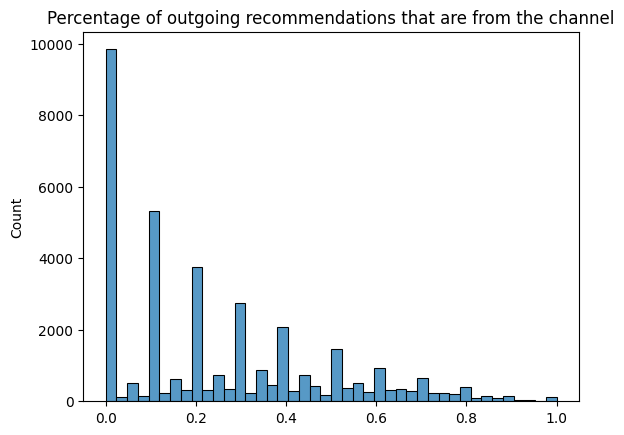

In [14]:
# Interesting distribution on self recs.
sns.histplot(recs)
plt.title('Percentage of outgoing recommendations that are from the channel')

In [15]:
np.median(recs) #Most don't actually self recommend

0.2

In [16]:
np.mean(recs) 

0.24841594163084096

In [132]:
G.nodes[1]

{'title': 'China Airlines Crashes 747 in Chicago | Viral Debrief',
 'view_count': 611836,
 'published_on': '2022-03-20'}

In [135]:
for node in G:
    pred_res = []
    preds = G.predecessors(node)
    for pred in preds:
        pred_res.append(G.nodes[pred]['view_count'])
    if pred_res:
        G.nodes[node]['pred_view_count_avg'] = np.mean(pred_res)
    else:
        G.nodes[node]['pred_view_count_avg'] = -1
    
    succ_res = []
    succs = G.successors(node)
    for succ in succs:
        succ_res.append(G.nodes[succ]['view_count'])
    if succ_res:
        G.nodes[node]['succ_view_count_avg'] = np.mean(succ_res)
    else:
        G.nodes[node]['succ_view_count_avg'] = -1

In [143]:
for node in G:
    pred_res = []
    preds = G.predecessors(node)
    for pred in preds:
        pred_res.append(degree_dict[pred])
    if pred_res:
        G.nodes[node]['pred_in_degree_avg'] = np.mean(pred_res)
    else:
        G.nodes[node]['pred_in_degree_avg'] = -1
    
    succ_res = []
    succs = G.successors(node)
    for succ in succs:
        succ_res.append(degree_dict[succ])
    if succ_res:
        G.nodes[node]['succ_in_degree_avg'] = np.mean(succ_res)
    else:
        G.nodes[node]['succ_in_degree_avg'] = -1

In [144]:
# Now each node contains info about its successors and predecessors 
G.nodes[400]

{'title': 'JWST First Full-Color Images Explained',
 'view_count': 826384,
 'published_on': '2022-07-13',
 'pred_view_count_avg': 1470675.25,
 'succ_view_count_avg': 2331096.2,
 'pred_in_degree_avg': 0.00030244528201236445,
 'succ_in_degree_avg': 0.00040389543172674824}

In [155]:
add_attr_from_pandas(G, video_df, 'id', columns=['description'])

In [27]:
# Now contains info about predecessors and successors as well as description.
G.nodes[2]

{'title': 'Cargo Pilot vs Passenger Pilot! Can you REALLY fly a B747 in Pyjamas?',
 'view_count': 322141,
 'published_on': datetime.datetime(2020, 4, 21, 0, 0),
 'pred_view_count_avg': 300793.0,
 'succ_view_count_avg': 1122302.8,
 'pred_in_degree_avg': 1.1835129145795226e-05,
 'succ_in_degree_avg': 0.00010462542826569459,
 'description': 'Get the FREE Mentour Aviation app 📲https://www.mentourpilot.com/apps/ \n\nDo you need any special license in order for a passenger pilot to fly cargo? Can you fly a Boeing 747 in a pyjamas?\nThese and many more questions will be answered in todays Mentour special about cargo-pilots vs passenger-pilot with guest start Kelsey from 74Gear.\nPlease file your questions in the comments below, like the video if you would like to see more of these type of collaborations or if you just liked the video and its content.\n\nIf you want to support my channel and what I do, consider joining my Patreon crew, use the link below to check it out!\n📲 https://www.patreon

In [ ]:
nx.betweenness_centrality(G, k=60000)

In [52]:
for node in G:
    G.nodes[node]['published_on'] = datetime.strptime(G.nodes[node]['published_on'], '%Y-%m-%d')

In [54]:
for node in G:
    pred_res = []
    preds = G.predecessors(node)
    for pred in preds:
        pred_res.append((G.nodes[node]['published_on'] - G.nodes[pred]['published_on']).days)
    if pred_res:
        G.nodes[node]['pred_time_diff_avg'] = np.mean(pred_res)
    else:
        G.nodes[node]['pred_time_diff_avg'] = float('inf')
    
    succ_res = []
    succs = G.successors(node)
    for succ in succs:
        succ_res.append((G.nodes[node]['published_on'] - G.nodes[succ]['published_on']).days)
    if succ_res:
        G.nodes[node]['succ_time_diff_avg'] = np.mean(succ_res)
    else:
        G.nodes[node]['succ_time_diff_avg'] = float('inf')

In [56]:
G.nodes[12000]

{'title': 'REBUILDING a 300-year-old Oak Staircase  |  2/3',
 'view_count': 528838,
 'published_on': datetime.datetime(2022, 7, 30, 0, 0),
 'pred_view_count_avg': 2916612.1666666665,
 'succ_view_count_avg': 2101783.0,
 'pred_in_degree_avg': 9.52583565393274e-06,
 'succ_in_degree_avg': 1.8257851670037755e-05,
 'description': 'https://www.patreon.com/join/carlrogers\nhttps://www.instagram.com/carlroge\nhttps://www.carlrogers.co/\n\nPart 3 on Patreon',
 'pred_time_diff_avg': 291.1666666666667,
 'succ_time_diff_avg': 84.0}

In [61]:
len(G.nodes)

629867

<AxesSubplot: ylabel='Count'>

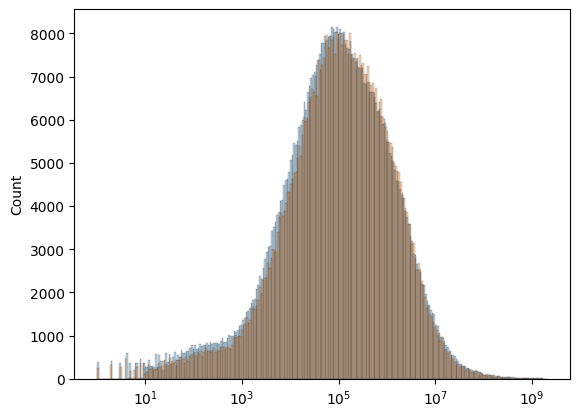

In [14]:
# Some cool histograms?
pred_view_count_avgs = []
for node in G:
    val = G.nodes[node]['pred_view_count_avg']
    if val != -1:
        pred_view_count_avgs.append(val)
sns.histplot(get_node_attributes(G, 'view_count'), log_scale=True, alpha=.3)
sns.histplot(pred_view_count_avgs, log_scale=True, alpha=.3)

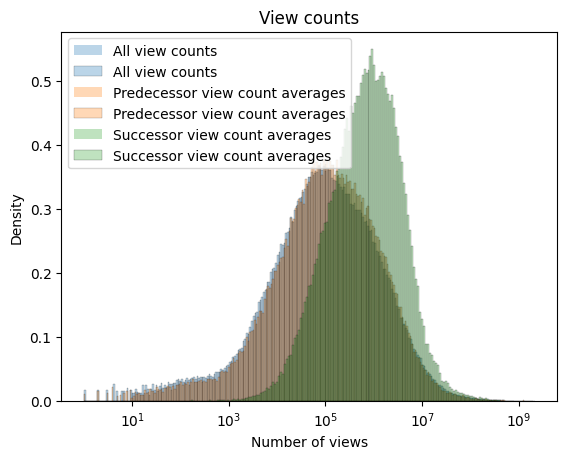

In [15]:
# I think this means there are outliers which are very big
succ_view_count_avgs = []
for node in G:
    val = G.nodes[node]['succ_view_count_avg']
    if val != -1:
        succ_view_count_avgs.append(val)
sns.histplot(get_node_attributes(G, 'view_count'), log_scale=True, alpha=0.3,stat='density', label='All view counts')
sns.histplot(pred_view_count_avgs, log_scale=True, alpha=0.3, stat='density', label='Predecessor view count averages')
sns.histplot(succ_view_count_avgs, log_scale=True, alpha=.3,stat='density', label='Successor view count averages')
plt.title('View counts')
plt.xlabel('Number of views')
plt.legend()

<AxesSubplot: ylabel='Count'>

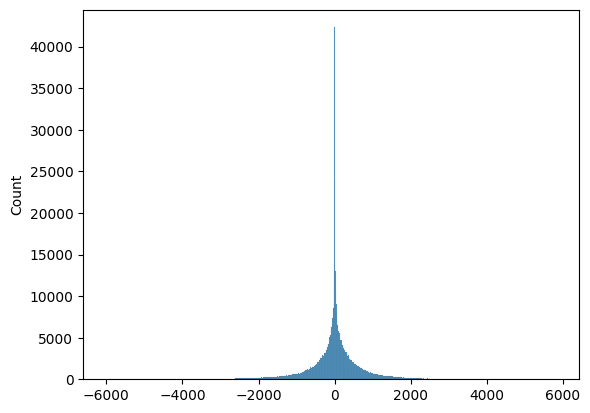

In [23]:
pred_time_avgs = []
for node in G:
    val = G.nodes[node]['pred_time_diff_avg']
    if val != float('inf'):
        pred_time_avgs.append(val)
sns.histplot(pred_time_avgs)

Text(0.5, 1.0, 'Log Average Time Difference in Days Between Predecessor')

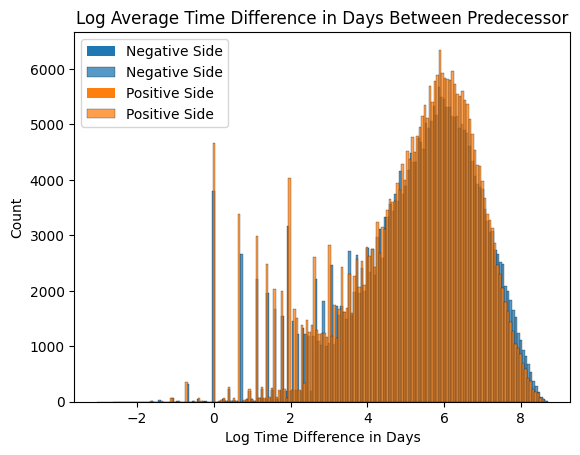

In [26]:
pred_time_avgs = np.array(pred_time_avgs)
sns.histplot(np.log(-pred_time_avgs[pred_time_avgs<0]), label='Negative Side')
sns.histplot(np.log(pred_time_avgs[pred_time_avgs>0]), label='Positive Side')
plt.xlabel('Log Time Difference in Days')
plt.legend()
plt.title('Log Average Time Difference in Days Between Predecessor')

<AxesSubplot: ylabel='Count'>

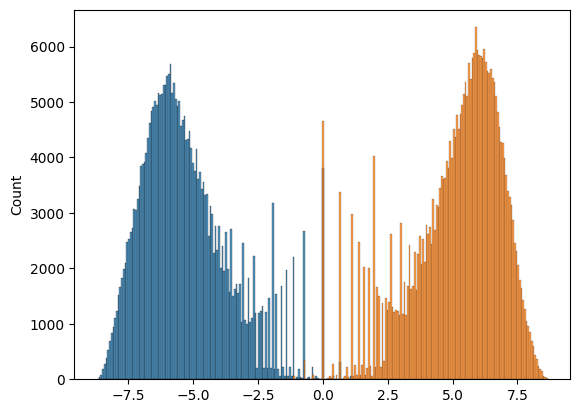

In [22]:
a = np.array(pred_time_avgs)
negs = -np.log(-a[a<0])
poss = np.log(a[a>0])
sns.histplot(negs)
sns.histplot(poss)
# sns.histplot(np.concatenate([negs, poss]))

C:\Users\Sebby\AppData\Roaming\Python\Python39\site-packages\pandas\core\arraylike.py:405: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Sebby\AppData\Roaming\Python\Python39\site-packages\pandas\core\arraylike.py:405: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: autodetected range of [-inf, 3.7657430414210444] is not finite

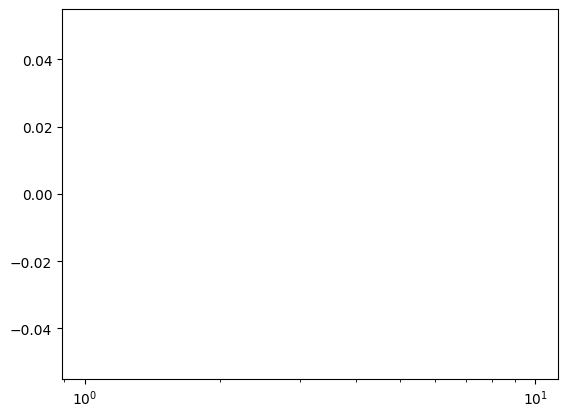

In [13]:
sns.histplot(pred_time_avgs, log_scale=True)

<AxesSubplot: ylabel='Count'>

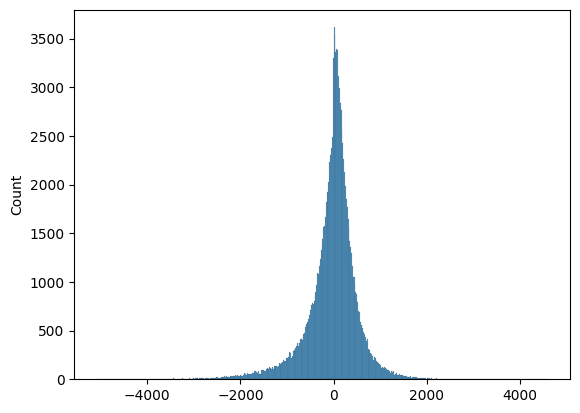

In [27]:
succ_time_avgs = []
for node in G:
    val = G.nodes[node]['succ_time_diff_avg']
    if val != float('inf'):
        succ_time_avgs.append(val)
sns.histplot(succ_time_avgs)

Text(0.5, 1.0, 'Log Average Time Difference in Days Between Successor')

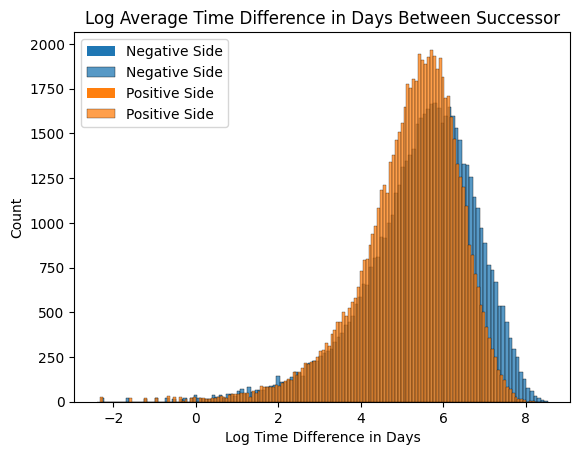

In [29]:
succ_time_avgs = np.array(succ_time_avgs)
sns.histplot(np.log(-succ_time_avgs[succ_time_avgs<0]), label='Negative Side')
sns.histplot(np.log(succ_time_avgs[succ_time_avgs>0]), label='Positive Side')
plt.xlabel('Log Time Difference in Days')
plt.legend()
plt.title('Log Average Time Difference in Days Between Successor')

In [30]:
# There is a high number of nodes with no successors.
count = 0
for elem in succ_time_avgs:
    if elem == float('inf'):
        count += 1
count

502229

In [30]:
len(G)

629867

In [35]:
np.log(len(G)) / np.log(20)

4.457429017556317

In [36]:
20**4.45

616003.9268890724

In [33]:
# This is sort of confusing given the number of nodes.
no_succs = 0
for node in G:
    if len(list(G.successors(node))) == 0:
        no_succs += 1
no_succs

502229

<AxesSubplot: ylabel='Count'>

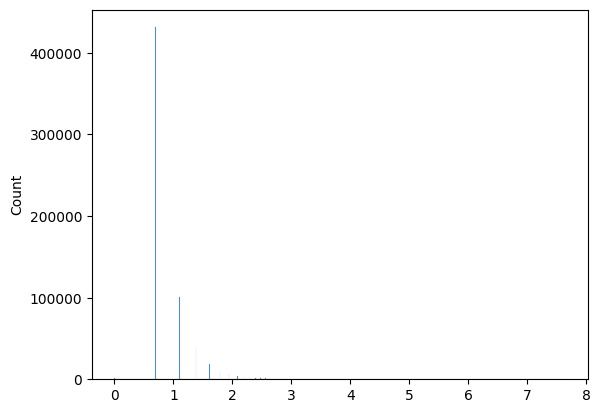

In [38]:
sns.histplot([np.log(G.in_degree(node) + 1) for node in G])

In [32]:
# Forgot to mention this, but I calculated time diff in only days, can increase granularity though.
scipy.stats.mode(pred_time_avgs), scipy.stats.mode(succ_time_avgs)

C:\Users\Sebby\AppData\Local\Temp\ipykernel_1172\759237627.py:2: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  scipy.stats.mode(pred_time_avgs), scipy.stats.mode(succ_time_avgs)


(ModeResult(mode=array([0.]), count=array([8922])),
 ModeResult(mode=array([0.]), count=array([42])))

### Further Visualization ###

In [41]:
channel_G.nodes[100]

{'percent_self_rec_target': 0.2871725076556652,
 'percent_self_rec_source': 0.46914952751528627}

In [17]:
self_rec_target = get_node_attributes(channel_G, 'percent_self_rec_target')
self_rec_target = [val for val in self_rec_target if val != -1]

C:\Users\Sebby\AppData\Local\Temp\ipykernel_26544\2698149419.py:1: RuntimeWarning: divide by zero encountered in log
  sns.scatterplot(np.log(self_rec_target))


Text(0.5, 1.0, 'When channel is encountered vs log self rec target')

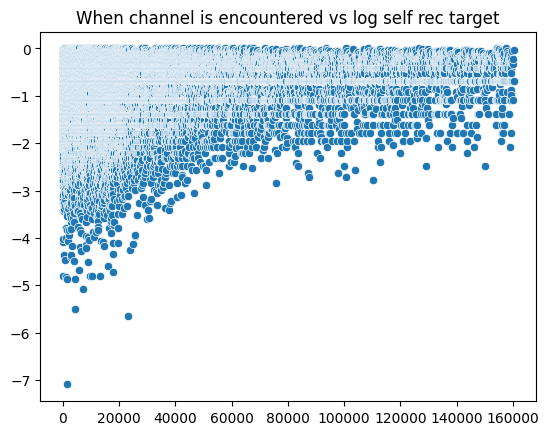

In [57]:
sns.scatterplot(np.log(self_rec_target))
plt.title('When channel is encountered vs log self rec target')

In [10]:
self_rec_source = get_node_attributes(channel_G, 'percent_self_rec_source')
self_rec_source = [val for val in self_rec_source if val != -1]

C:\Users\Sebby\AppData\Local\Temp\ipykernel_26544\2179385598.py:1: RuntimeWarning: divide by zero encountered in log
  sns.scatterplot(np.log(self_rec_source))


Text(0.5, 1.0, 'When channel is encountered vs log self rec source')

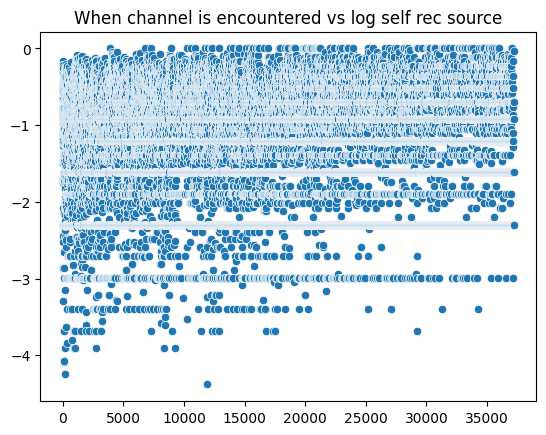

In [58]:
sns.scatterplot(np.log(self_rec_source))
plt.title('When channel is encountered vs log self rec source')

In [7]:
total_recs_source = [channel_G.in_degree(node) for node in channel_G if channel_G.nodes[node]['percent_self_rec_source'] != -1]
total_recs_target = [channel_G.in_degree(node) for node in channel_G if channel_G.nodes[node]['percent_self_rec_target'] != -1]

In [29]:
from collections import Counter
unique = Counter()
for val in [G.out_degree(node) for node in G]:
    unique[val] += 1
unique

Counter({10: 121045,
         0: 502229,
         9: 459,
         8: 367,
         1: 825,
         5: 349,
         4: 333,
         2: 463,
         7: 297,
         6: 331,
         3: 407,
         11: 550,
         12: 611,
         15: 297,
         13: 515,
         14: 448,
         16: 175,
         18: 39,
         17: 97,
         20: 7,
         19: 22,
         21: 1})

<AxesSubplot: ylabel='Count'>

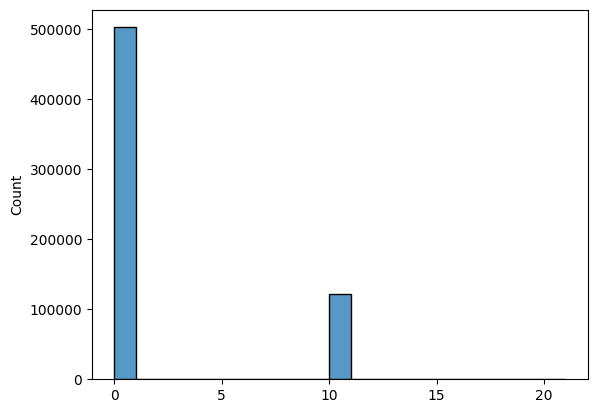

In [21]:
sns.histplot([G.out_degree(node) for node in G])

C:\Users\Sebby\AppData\Local\Temp\ipykernel_24832\258105534.py:5: RuntimeWarning: divide by zero encountered in log
  sns.scatterplot(x=jitter(np.log(total_recs_source)), y=np.array(self_rec_source), alpha=.2, s=5)


Text(0.5, 1.0, 'Log number of incoming recs vs prop of outgoing recs to same channel')

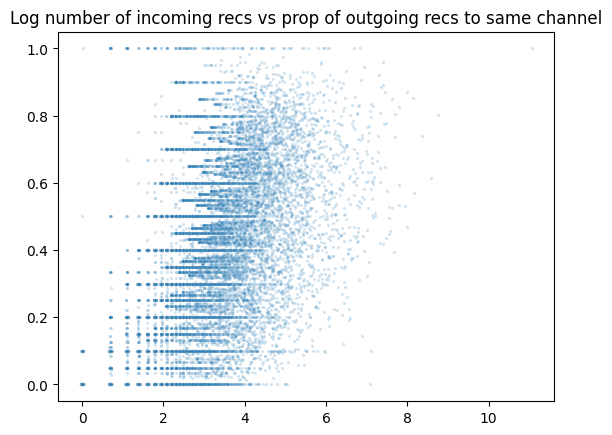

In [20]:
# color points by popularity of channel
def jitter(values):
    return values + np.random.normal(0,0.01,values.shape)

sns.scatterplot(x=jitter(np.log(total_recs_source)), y=np.array(self_rec_source), alpha=.2, s=5)
plt.title('Log number of incoming recs vs prop of outgoing recs to same channel')

Text(0.5, 1.0, 'Log number of recommendations vs log self rec target')

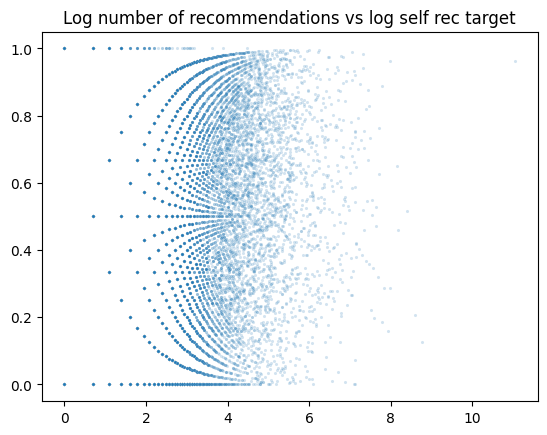

In [18]:
sns.scatterplot(x=np.log(total_recs_target), y=self_rec_target, alpha=.2, s=5)
plt.title('Log number of recommendations vs self rec target')
plt.xlabel('Log number of recommendations')
plt.ylabel('Proportion of incoming recommendations ')

In [3]:
# Calculate number of videos corresponding to channel
channel_vid_counts = video_df.groupby('channel_id').count()['id']
max(channel_vid_counts)

13598

In [16]:
# TedTalk recommended 13598 videos 
channel_df[channel_df['id'] == 84]

,id,youtube_id,url,html_lang,type,language,short_name,human_name,raw_subscriber_count,subscriber_count,description,created_at,updated_at
88,84,UCsT0YIqwnpJCM-mx7-gSA4Q,https://www.youtube.com/user/TEDxTalks,en,/user/,NaN,TEDxTalks,TEDx Talks,35.9M subscribers,35900000,TEDx is an international community that organi...,2022-08-10 15:40:43.387,2022-08-10 15:40:43.387


Text(0.5, 1.0, 'Log number of videos')

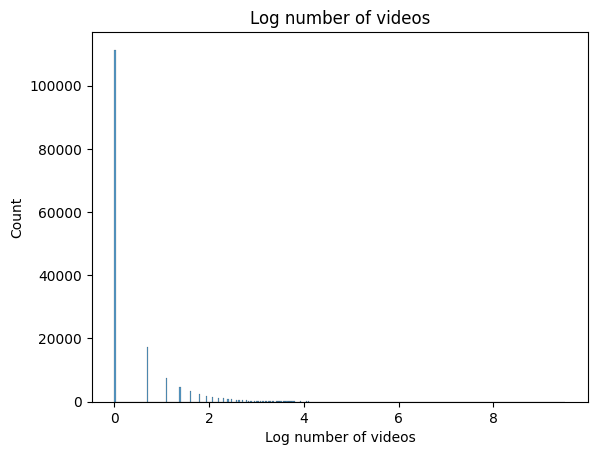

In [44]:
sns.histplot(np.log(channel_vid_counts))
plt.xlabel('Log number of videos')
plt.title('Log number of videos')

In [45]:
G.nodes[10]

{'title': 'Emirates A380 Failed Landing | Viral Debrief',
 'view_count': 830214,
 'published_on': datetime.datetime(2021, 8, 15, 0, 0),
 'pred_view_count_avg': 727473.0454545454,
 'succ_view_count_avg': 1230297.5,
 'pred_in_degree_avg': 1.3855760951174895e-05,
 'succ_in_degree_avg': 0.00017511661210479687,
 'description': "This landing of an Emirates A380 didn't go as planned as they floated down the runway but did they do the right thing?\n\nBe Part of the 74 Crew:\n\nIG:  https://www.instagram.com/74gear/ \nTwitter: https://twitter.com/74gear\nFacebook: https://facebook.com/74gear\n\nFlight Simulator Gear I use:\nYoke: https://geni.us/SimYoke\nComputer: https://geni.us/GamingComputer \n\nFlight Gear I use:\nAviation Headset: https://geni.us/AviationHeadset \nBackpack: https://geni.us/PilotBackpack \nTraveling headset: https://geni.us/DHheadset \n\nVideo Gear I use:\nCamera: https://geni.us/VideoCamera \nAction Camera: https://geni.us/Actioncamera\nFlight Audio Connector: https://geni

Text(0.5, 1.0, 'Date published vs predecessors time diff average')

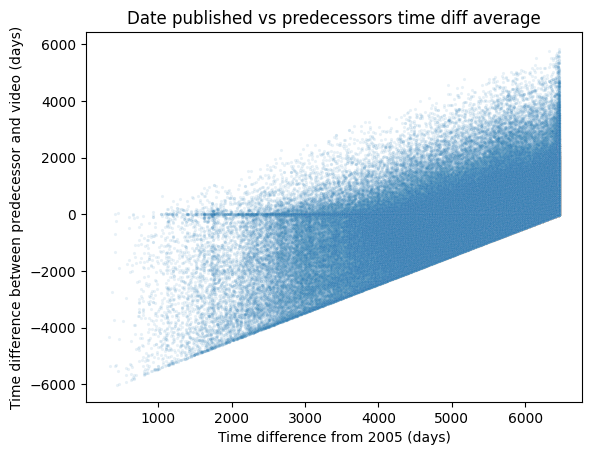

In [4]:
# I believe the line is there because YouTube is only 16 years old.
x, y = [], []
for node in G:
    val = G.nodes[node]['pred_time_diff_avg']
    if val != float('inf'):
        x.append((G.nodes[node]['published_on'] - datetime(2005, 1 , 1, 1, 1)).days)
        y.append(val)
sns.scatterplot(x=x, y=y, alpha=.1, s= 5)
plt.xlabel('Time difference from 2005 (days)')
plt.ylabel('Time difference between predecessor and video (days)')
plt.title('Date published vs predecessors time diff average')

Text(0.5, 1.0, 'Date published vs successors time diff average')

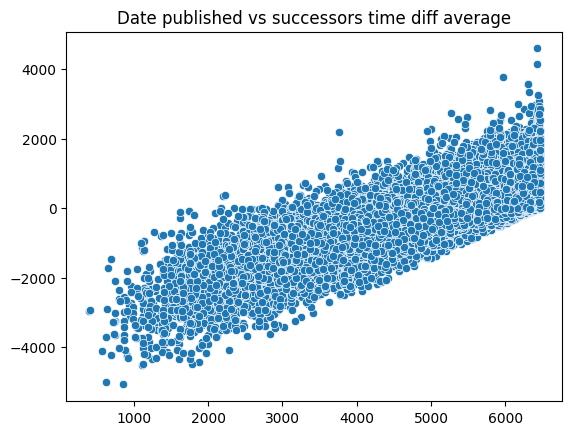

In [53]:
x, y = [], []
for node in G:
    val = G.nodes[node]['succ_time_diff_avg']
    if val != float('inf'):
        x.append((G.nodes[node]['published_on'] - datetime(2005, 1 , 1, 1, 1)).days)
        y.append(val)
sns.scatterplot(x=x, y=y)
plt.title('Date published vs successors time diff average')

In [3]:
G.nodes[100]

{'title': 'The Man Who Killed Millions and Saved Billions',
 'view_count': 10367494,
 'published_on': datetime.datetime(2022, 7, 22, 0, 0),
 'pred_view_count_avg': 2819924.391124871,
 'succ_view_count_avg': 10915866.2,
 'pred_in_degree_avg': 1.6284361982187397e-05,
 'succ_in_degree_avg': 0.00046787729453566317,
 'description': "Fritz Haber is the scientist who arguably most transformed the world. Part of this video is sponsored by Wren. Offset your carbon footprint on Wren: \u200bhttps://www.wren.co/start/veritasium1. For the first 100 people who sign up, I will personally pay for the first month of your subscription!\n\n▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀\nA huge thanks to Dan Charles for writing a fantastic biography of Fritz Haber, for taking the time to talk to us about it, and providing valuable feedback. This video would not be what it is without his contributions. http://site.danielcharles.us https://ve42.co/Charles\n\nThanks to Tom de Prinse from Explosions and 

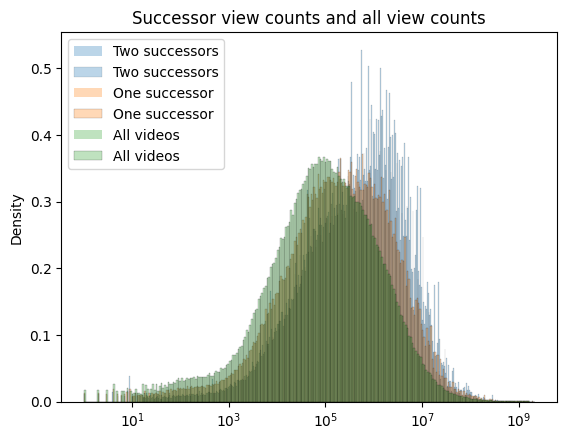

In [12]:
one_successor = []
two_successors = []
for node in G:
    for node2 in G.successors(node):
        one_successor.append(G.nodes[node2]['view_count'])
        for node3 in G.successors(node2):
            two_successors.append(G.nodes[node3]['view_count'])
            
sns.histplot(two_successors, log_scale=True, stat='density',label='Two successors', alpha=.3)  
sns.histplot(one_successor, log_scale=True, stat='density',label='One successor', alpha=.3) 
sns.histplot(get_node_attributes(G, 'view_count'), log_scale=True, stat='density', label='All videos', alpha=.3) 
plt.title("Successor view counts and all view counts")
plt.legend()

In [22]:
# View Count
pred_res, succ_res = [], []
for node in G:
    preds = G.predecessors(node)
    for pred in preds:
        pred_res.append(G.nodes[pred]['view_count'])
    
    succs = G.successors(node)
    for succ in succs:
        succ_res.append(G.nodes[succ]['view_count'])
pred_res = np.array(pred_res)
succ_res = np.array(succ_res)

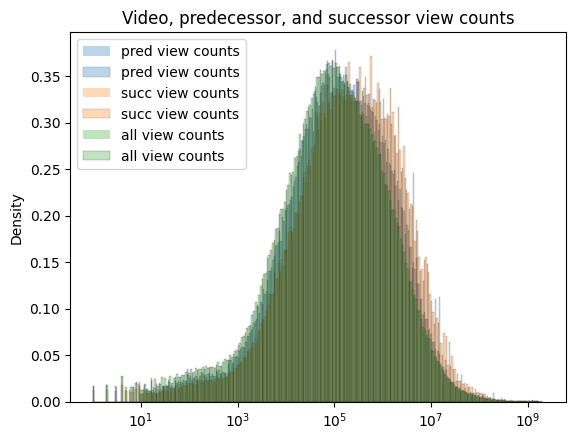

In [24]:
sns.histplot(pred_res, label="pred view counts", alpha = .3, log_scale=True,  stat='density')
sns.histplot(succ_res, label="succ view counts", alpha = .3, log_scale = True, stat='density')
sns.histplot(get_node_attributes(G, 'view_count'), alpha=.3, log_scale=True, stat='density', label='all view counts')
plt.title('Video, predecessor, and successor view counts')
plt.legend()

In [18]:
# Time differences.
pred_res, succ_res = [], []
for node in G:
    preds = G.predecessors(node)
    for pred in preds:
        pred_res.append((G.nodes[node]['published_on'] - G.nodes[pred]['published_on']).days)
    
    succs = G.successors(node)
    for succ in succs:
        succ_res.append((G.nodes[node]['published_on'] - G.nodes[succ]['published_on']).days)
pred_res = np.array(pred_res)
succ_res = np.array(succ_res)

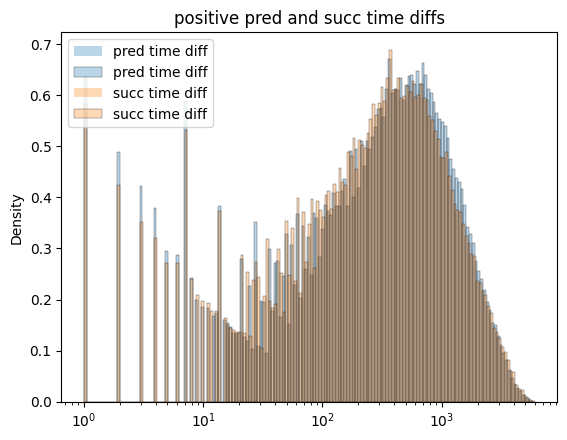

In [19]:
sns.histplot(pred_res[pred_res > 0], label="pred time diff", alpha = .3, log_scale=True,  stat='density')
sns.histplot(succ_res[succ_res > 0], label="succ time diff", alpha = .3, log_scale = True, stat='density')
plt.title("positive pred and succ time diffs")
plt.legend()

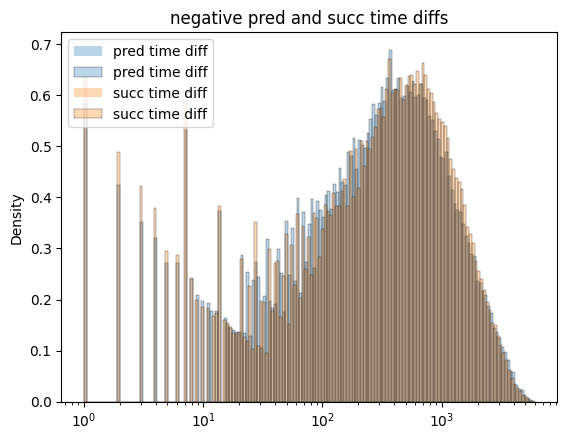

In [21]:
sns.histplot(-1 * pred_res[pred_res < 0], label="pred time diff", alpha = .3, log_scale=True,  stat='density')
sns.histplot(-1 * succ_res[succ_res < 0], label="succ time diff", alpha = .3, log_scale = True, stat='density')
plt.title("negative pred and succ time diffs")
plt.legend()